# Testing Poisson Distribution

In [1]:
from Historical_Data.get_historical_games import get_historical_data
import pandas as pd
from datetime import date, timedelta 

In [2]:
df_hist = get_historical_data(seasons=[19,20])

C:\Users\Asus\Documents\Python Scripts\BetGuider\Historical_Data\get_historical_games.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Div'] = df.apply(lambda x: div, axis=1)


In [3]:
df_hist.shape

(18585, 17)

**Dataset**
- Half of the season 20 and all season 19 for the Portuguese, Spanish, French, German, English and Italian teams. 

In [4]:
df_hist.columns


Index(['Div', 'League', 'Season', 'Date', 'Hour', 'Home Team', 'Away Team',
       'Home Goals', 'Away Goals', 'Home Shots Target', 'Away Shots Target',
       'Home Corners', 'Away Corners', 'More_2.5', 'BTS',
       'Home_Team_Promoted_Relegated', 'Away_Team_Promoted_Relegated'],
      dtype='object')

In [5]:
df_hist['League'].unique()

array(['Spanish La Liga', 'Spanish Segunda Division', 'German Bundesliga',
       'German Bundesliga 2', 'Italian Serie A', 'Italian Serie B',
       'English Premier League', 'English Championship',
       'English League 1', 'English League 2', 'Scotish Premier League',
       'Scotish Division 1', 'Scotish Division 2', 'Scotish Division 3',
       'French Ligue 1', 'French Ligue 2', 'Dutch Eredivisie',
       'Belgian First Division A', 'Portuguese Primeira Liga',
       'Turkish Super League', 'Greek Super League', 'Liga Profesional',
       'Bundesliga', 'Superliga', 'Liga MX', 'Ekstraklasa', 'Liga 1',
       'Premier League', 'Super League', 'Challenge League'], dtype=object)

In [6]:
df_hist.dtypes

Div                                     object
League                                  object
Season                                   int64
Date                            datetime64[ns]
Hour                                    object
Home Team                               object
Away Team                               object
Home Goals                             float64
Away Goals                             float64
Home Shots Target                      float64
Away Shots Target                      float64
Home Corners                           float64
Away Corners                           float64
More_2.5                                  bool
BTS                                       bool
Home_Team_Promoted_Relegated              bool
Away_Team_Promoted_Relegated              bool
dtype: object

In [7]:
leagues = ['Spanish La Liga', 'German Bundesliga', 'Italian Serie A', 'English Premier League',
           'French Ligue 1', 'Portuguese Primeira Liga']

df_test = df_hist.query('League in @leagues and Date > "2021-01-01" and ')

In [8]:
df_test.shape

(1298, 17)

In [9]:
df_test.head()

,Div,League,Season,Date,Hour,Home Team,Away Team,Home Goals,Away Goals,Home Shots Target,Away Shots Target,Home Corners,Away Corners,More_2.5,BTS,Home_Team_Promoted_Relegated,Away_Team_Promoted_Relegated
155,SP1,Spanish La Liga,20,2021-02-01,13:00,villarreal,levante,2.0,1.0,7.0,2.0,3.0,5.0,True,True,False,False
156,SP1,Spanish La Liga,20,2021-02-01,15:15,betis,sevilla,1.0,1.0,3.0,2.0,2.0,1.0,False,True,False,False
157,SP1,Spanish La Liga,20,2021-02-01,17:30,getafe,valladolid,0.0,1.0,4.0,2.0,5.0,9.0,False,False,False,False
158,SP1,Spanish La Liga,20,2021-02-01,20:00,real madrid,celta,2.0,0.0,2.0,1.0,1.0,5.0,False,False,False,False
159,SP1,Spanish La Liga,20,2021-03-01,13:00,ath bilbao,elche,1.0,0.0,2.0,2.0,5.0,4.0,False,False,False,True


In [10]:
df_test.tail()

,Div,League,Season,Date,Hour,Home Team,Away Team,Home Goals,Away Goals,Home Shots Target,Away Shots Target,Home Corners,Away Corners,More_2.5,BTS,Home_Team_Promoted_Relegated,Away_Team_Promoted_Relegated
301,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,moreirense,famalicao,3.0,0.0,3.0,3.0,6.0,3.0,True,False,False,False
302,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,nacional,rio ave,1.0,2.0,2.0,14.0,1.0,16.0,True,True,True,False
303,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,portimonense,sp braga,0.0,0.0,2.0,1.0,4.0,5.0,False,False,False,False
304,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,santa clara,farense,4.0,0.0,5.0,1.0,1.0,4.0,True,False,False,True
305,P1,Portuguese Primeira Liga,20,2021-05-19,21:45,sp lisbon,maritimo,5.0,1.0,6.0,1.0,4.0,3.0,True,True,False,False


In [11]:
def draw(x):
    if x['Home Goals'] == x['Away Goals']:
        return 1
    else:
        return 0
    
df_test['Draw'] = df_test.apply(draw, axis=1)

C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
df_test.head(10)

,Div,League,Season,Date,Hour,Home Team,Away Team,Home Goals,Away Goals,Home Shots Target,Away Shots Target,Home Corners,Away Corners,More_2.5,BTS,Home_Team_Promoted_Relegated,Away_Team_Promoted_Relegated,Draw
155,SP1,Spanish La Liga,20,2021-02-01,13:00,villarreal,levante,2.0,1.0,7.0,2.0,3.0,5.0,True,True,False,False,0
156,SP1,Spanish La Liga,20,2021-02-01,15:15,betis,sevilla,1.0,1.0,3.0,2.0,2.0,1.0,False,True,False,False,1
157,SP1,Spanish La Liga,20,2021-02-01,17:30,getafe,valladolid,0.0,1.0,4.0,2.0,5.0,9.0,False,False,False,False,0
158,SP1,Spanish La Liga,20,2021-02-01,20:00,real madrid,celta,2.0,0.0,2.0,1.0,1.0,5.0,False,False,False,False,0
159,SP1,Spanish La Liga,20,2021-03-01,13:00,ath bilbao,elche,1.0,0.0,2.0,2.0,5.0,4.0,False,False,False,True,0
160,SP1,Spanish La Liga,20,2021-03-01,15:15,alaves,ath madrid,1.0,2.0,1.0,4.0,1.0,5.0,True,True,False,False,0
161,SP1,Spanish La Liga,20,2021-03-01,17:30,eibar,granada,2.0,0.0,7.0,3.0,4.0,2.0,False,False,False,False,0
162,SP1,Spanish La Liga,20,2021-03-01,17:30,sociedad,osasuna,1.0,1.0,2.0,2.0,7.0,2.0,False,True,False,False,1
163,SP1,Spanish La Liga,20,2021-03-01,20:00,huesca,barcelona,0.0,1.0,4.0,7.0,2.0,6.0,False,False,True,False,0
164,SP1,Spanish La Liga,20,2021-04-01,20:00,valencia,cadiz,1.0,1.0,4.0,2.0,9.0,7.0,False,True,False,True,1


In [21]:
#League Average Goals Scored at Home and Away
def league_average_goals(df, div:str, home_away:str):
    if home_away == 'home':
        total_goals = df.query('Div==@div')['Home Goals'].sum()
        total_matchs = df.query('Div==@div').shape[0]
        avg_goals = total_goals / total_matchs
    
    elif home_away == 'away':
        total_goals = df.query('Div==@div')['Away Goals'].sum()
        total_matchs = df.query('Div==@div').shape[0]
        avg_goals = total_goals / total_matchs
        
    else:
        raise Exception('Bad home_away argument')
        
    return avg_goals


#Team Average Goals Scored
def team_average_goals_scored(df, team:str, home_away:str):
    if home_away == 'home':
        total_goals = df.query('`Home Team`==@team')['Home Goals'].sum()
        total_matchs = df.query('`Home Team`==@team').shape[0]
        avg_goals = total_goals / total_matchs
    
    elif home_away == 'away':
        total_goals = df.query('`Away Team`==@team')['Away Goals'].sum()
        total_matchs = df.query('`Away Team`==@team').shape[0]
        avg_goals = total_goals / total_matchs
    
    else:
        raise Exception('Bad home_away argument')
        
    return avg_goals
    

#Team Average Goals Conceded
def team_average_goals_conceded(df, team:str, home_away:str):
    if home_away == 'home':
        total_goals = df.query('`Home Team`==@team')['Away Goals'].sum()
        total_matchs = df.query('`Home Team`==@team').shape[0]
        avg_goals = total_goals / total_matchs
    
    elif home_away == 'away':
        total_goals = df.query('`Away Team`==@team')['Home Goals'].sum()
        total_matchs = df.query('`Away Team`==@team').shape[0]
        avg_goals = total_goals / total_matchs
    
    else:
        raise Exception('Bad home_away argument')
        
    return avg_goals




In [22]:
def get_league_average_goals(x, df_hist, home_away:str):
    div = x['Div']
    #Get historic games
    game_date = x['Date']
    limit_date = game_date - timedelta(weeks=1)
    df = df_hist.query('Date <= @limit_date')
    return league_average_goals(df, div, home_away)


df_test['League Home Average Goals'] = df_test.apply(get_league_average_goals, df_hist=df_hist, home_away='home', axis=1)
df_test['League Away Average Goals'] = df_test.apply(get_league_average_goals, df_hist=df_hist, home_away='away', axis=1)    

C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
df_test.query('Div == "SP1"')['League Home Average Goals'].mean()

1.392561595869491

In [16]:
df_test.query('Div == "P1"')['League Home Average Goals'].mean()

1.3088067532373844

In [17]:
df_test.query('Div == "E0"')['League Home Average Goals'].mean()

1.4556318269805273

In [25]:
def goal_expectancy(x, df_hist, home_away='home'):
    #Get historic games
    game_date = x['Date']
    limit_date = game_date - timedelta(weeks=1)
    df = df_hist.query('Date <= @limit_date')
    if home_away == 'home':
        home_team_average_goals_scored = team_average_goals_scored(df, x['Home Team'], 'home')
        home_attack_strenght = home_team_average_goals_scored / x['League Home Average Goals']
        away_team_average_goals_conceded = team_average_goals_conceded(df, x['Away Team'], 'away')
        away_defense_strenght = away_team_average_goals_conceded / x['League Home Average Goals']
        goal_expectancy = home_attack_strenght*away_defense_strenght*x['League Home Average Goals']
        return goal_expectancy
        
    elif home_away == 'away':
        away_team_average_goals_scored = team_average_goals_scored(df, x['Away Team'], 'away')
        away_attack_strenght = away_team_average_goals_scored / x['League Away Average Goals']
        home_team_average_goals_conceded = team_average_goals_conceded(df, x['Home Team'], 'home')
        home_defense_strenght = home_team_average_goals_conceded / x['League Away Average Goals']
        goal_expectancy = away_attack_strenght*home_defense_strenght*x['League Away Average Goals']
        return goal_expectancy
    
    else:
        raise Exception('Bad home_away input')
        
    
    

In [26]:
df_test['Home Team Goals Expectancy'] = df_test.apply(goal_expectancy, df_hist=df_hist, home_away= 'home', axis=1)
df_test['Away Team Goals Expectancy'] = df_test.apply(goal_expectancy, df_hist=df_hist, home_away= 'away', axis=1)


C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df_test

,Div,League,Season,Date,Hour,Home Team,Away Team,Home Goals,Away Goals,Home Shots Target,Away Shots Target,Home Corners,Away Corners,More_2.5,BTS,Home_Team_Promoted_Relegated,Away_Team_Promoted_Relegated,Draw,League Home Average Goals,League Away Average Goals,Home Team Goals Expectancy,Away Team Goals Expectancy
155,SP1,Spanish La Liga,20,2021-02-01,13:00,villarreal,levante,2.0,1.0,7.0,2.0,3.0,5.0,True,True,False,False,0,1.416816,1.055456,2.203850,1.196407
156,SP1,Spanish La Liga,20,2021-02-01,15:15,betis,sevilla,1.0,1.0,3.0,2.0,2.0,1.0,False,True,False,False,1,1.416816,1.055456,1.116596,1.809694
157,SP1,Spanish La Liga,20,2021-02-01,17:30,getafe,valladolid,0.0,1.0,4.0,2.0,5.0,9.0,False,False,False,False,0,1.416816,1.055456,1.254970,0.717844
158,SP1,Spanish La Liga,20,2021-02-01,20:00,real madrid,celta,2.0,0.0,2.0,1.0,1.0,5.0,False,False,False,False,0,1.416816,1.055456,2.067009,0.493065
159,SP1,Spanish La Liga,20,2021-03-01,13:00,ath bilbao,elche,1.0,0.0,2.0,2.0,5.0,4.0,False,False,False,True,0,1.396985,1.063652,1.141621,0.826690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,moreirense,famalicao,3.0,0.0,3.0,3.0,6.0,3.0,True,False,False,False,0,1.281768,1.128913,1.353803,1.652391
302,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,nacional,rio ave,1.0,2.0,2.0,14.0,1.0,16.0,True,True,True,False,0,1.281768,1.128913,0.929238,1.338602
303,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,portimonense,sp braga,0.0,0.0,2.0,1.0,4.0,5.0,False,False,False,False,1,1.281768,1.128913,0.932143,1.644280
304,P1,Portuguese Primeira Liga,20,2021-05-19,20:00,santa clara,farense,4.0,0.0,5.0,1.0,1.0,4.0,True,False,False,True,0,1.281768,1.128913,1.053136,0.870421


In [28]:
def bts_pred(x):
    if x['Home Team Goals Expectancy'] > 1 and x['Away Team Goals Expectancy'] > 1:
        return True
    else:
        return False
    
df_test['BTS_PRED'] = df_test.apply(bts_pred, axis=1)

C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
df_test.head(20)

,Div,League,Season,Date,Hour,Home Team,Away Team,Home Goals,Away Goals,Home Shots Target,Away Shots Target,Home Corners,Away Corners,More_2.5,BTS,Home_Team_Promoted_Relegated,Away_Team_Promoted_Relegated,Draw,League Home Average Goals,League Away Average Goals,Home Team Goals Expectancy,Away Team Goals Expectancy,BTS_PRED
155,SP1,Spanish La Liga,20,2021-02-01,13:00,villarreal,levante,2.0,1.0,7.0,2.0,3.0,5.0,True,True,False,False,0,1.416816,1.055456,2.203850,1.196407,True
156,SP1,Spanish La Liga,20,2021-02-01,15:15,betis,sevilla,1.0,1.0,3.0,2.0,2.0,1.0,False,True,False,False,1,1.416816,1.055456,1.116596,1.809694,True
157,SP1,Spanish La Liga,20,2021-02-01,17:30,getafe,valladolid,0.0,1.0,4.0,2.0,5.0,9.0,False,False,False,False,0,1.416816,1.055456,1.254970,0.717844,False
158,SP1,Spanish La Liga,20,2021-02-01,20:00,real madrid,celta,2.0,0.0,2.0,1.0,1.0,5.0,False,False,False,False,0,1.416816,1.055456,2.067009,0.493065,False
159,SP1,Spanish La Liga,20,2021-03-01,13:00,ath bilbao,elche,1.0,0.0,2.0,2.0,5.0,4.0,False,False,False,True,0,1.396985,1.063652,1.141621,0.826690,False
160,SP1,Spanish La Liga,20,2021-03-01,15:15,alaves,ath madrid,1.0,2.0,1.0,4.0,1.0,5.0,True,True,False,False,0,1.396985,1.063652,0.552915,1.417801,False
161,SP1,Spanish La Liga,20,2021-03-01,17:30,eibar,granada,2.0,0.0,7.0,3.0,4.0,2.0,False,False,False,False,0,1.396985,1.063652,1.299477,1.430629,True
162,SP1,Spanish La Liga,20,2021-03-01,17:30,sociedad,osasuna,1.0,1.0,2.0,2.0,7.0,2.0,False,True,False,False,1,1.396985,1.063652,1.645580,0.847222,False
163,SP1,Spanish La Liga,20,2021-03-01,20:00,huesca,barcelona,0.0,1.0,4.0,7.0,2.0,6.0,False,False,True,False,0,1.396985,1.063652,1.116075,1.372607,True
164,SP1,Spanish La Liga,20,2021-04-01,20:00,valencia,cadiz,1.0,1.0,4.0,2.0,9.0,7.0,False,True,False,True,1,1.377358,1.058176,1.201148,0.945891,False


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(df_test['BTS'], df_test['BTS_PRED'])

0.5269645608628659

In [33]:
df_test.query('BTS==True').shape

(683, 23)

In [34]:
df_test.shape

(1298, 23)

In [37]:
from scipy.stats import poisson

In [39]:
poisson.pmf(1,1.23)

0.3595198705474571

In [40]:
def draw_probability(x):
    prob = 0
    for i in range(0,6):
        prob_i = poisson.pmf(i,x['Home Team Goals Expectancy'])*poisson.pmf(i,x['Away Team Goals Expectancy'])
        prob += prob_i
    
    return prob

df_test['Draw_P'] = df_test.apply(draw_probability, axis=1)
        

C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [41]:
df_test.head()

,Div,League,Season,Date,Hour,Home Team,Away Team,Home Goals,Away Goals,Home Shots Target,Away Shots Target,Home Corners,Away Corners,More_2.5,BTS,Home_Team_Promoted_Relegated,Away_Team_Promoted_Relegated,Draw,League Home Average Goals,League Away Average Goals,Home Team Goals Expectancy,Away Team Goals Expectancy,BTS_PRED,Draw_P
155,SP1,Spanish La Liga,20,2021-02-01,13:00,villarreal,levante,2.0,1.0,7.0,2.0,3.0,5.0,True,True,False,False,0,1.416816,1.055456,2.203850,1.196407,True,0.199411
156,SP1,Spanish La Liga,20,2021-02-01,15:15,betis,sevilla,1.0,1.0,3.0,2.0,2.0,1.0,False,True,False,False,1,1.416816,1.055456,1.116596,1.809694,True,0.230567
157,SP1,Spanish La Liga,20,2021-02-01,17:30,getafe,valladolid,0.0,1.0,4.0,2.0,5.0,9.0,False,False,False,False,0,1.416816,1.055456,1.254970,0.717844,False,0.295549
158,SP1,Spanish La Liga,20,2021-02-01,20:00,real madrid,celta,2.0,0.0,2.0,1.0,1.0,5.0,False,False,False,False,0,1.416816,1.055456,2.067009,0.493065,False,0.178576
159,SP1,Spanish La Liga,20,2021-03-01,13:00,ath bilbao,elche,1.0,0.0,2.0,2.0,5.0,4.0,False,False,False,True,0,1.396985,1.063652,1.141621,0.826690,False,0.306097


In [44]:
def pred_draw(x, thresh):
    if x > thresh:
        return 1
    else:
        return 0

In [113]:
df_test['Draw_PRED'] = df_test['Draw_P'].apply(pred_draw, thresh=0.3)

C:\Users\Asus\anaconda3\envs\ArBets\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df_test['Draw_PRED'].sum() / len(df_test['Draw_PRED'])

0.09861325115562404

In [115]:
accuracy_score(df_test['Draw'], df_test['Draw_PRED'])

0.7126348228043143

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

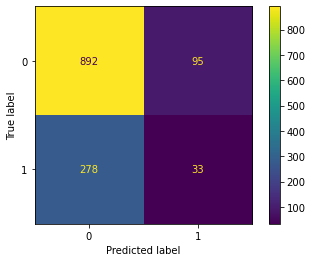

In [116]:
cm = confusion_matrix(df_test['Draw'], df_test['Draw_PRED'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [117]:
tn, fp, fn, tp = confusion_matrix(df_test['Draw'], df_test['Draw_PRED']).ravel()

In [118]:
tp/(fp+tp)

0.2578125

In [78]:
pd.set_option('display.max_rows', None)

In [2]:
(33+892) / (33+892+9+278)

0.7632013201320133